In [19]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
#!pip install squarify
#plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import pygsheets
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

In [20]:
#connect to google sheets
gc = pygsheets.authorize()

In [21]:
#choose which sheet to open
sh = gc.open('Diversity Equity & Inclusion Survey (Responses)')

In [22]:
#get 'Diversity Equity & Inclusion Survey (Responses)' id
sh.id

'1GCaCKhpp_JjQl2rkwx2Pr46jvzIlHnQidWxDQosUZak'

In [23]:
#check title
sh.title

'Diversity Equity & Inclusion Survey (Responses)'

In [24]:
#check url
sh.url

'https://docs.google.com/spreadsheets/d/1GCaCKhpp_JjQl2rkwx2Pr46jvzIlHnQidWxDQosUZak'

In [25]:
#when was the sheet last updates
sh.updated

'2020-10-12T19:17:41.593Z'

In [26]:
#get the sheet we want to look at. In our case only one sheet called it wk1 of responses
wk1 = sh.sheet1

In [27]:
#check title, id and url
wk1.title
wk1.id
wk1.url

'https://docs.google.com/spreadsheets/d/1GCaCKhpp_JjQl2rkwx2Pr46jvzIlHnQidWxDQosUZak/edit#gid=1691373338'

In [28]:
#how many rows in sheet
wk1.rows

306

In [11]:
#how many columns
wk1.cols

27

In [12]:
#create a dataframe
dei=pd.DataFrame(wk1.get_all_records())

In [13]:
#take a look at the data 
dei

,Timestamp,What is your age?,What is your gender?,What is your race?,What is your sexual orientation?,What is your gender identity?,How long have you worked for FC?,What is your employment status?,Which DEI efforts would you like to see prioritized at Foundation Communities? (Select your top 3),Other (please let us know what other efforts you'd like to see prioritized),...,"At work, I feel comfortable being myself.",Diversity and Inclusiveness issues are openly discussed.,Employees in my organization are treated with respect and dignity.,"Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.",I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.,"If I raised a concern about ethics and integrity, I am confident my employer would do what is right.",My organization treasures diverse opinions and ideas.,My team members appreciate my contributions.,My supervisor tries to understand my point of view.,My workplace is committed to building the strengths of each employee.
0,9/17/2020 15:54:34,35-44,Female,Afro Latinx,,Woman,1-3 years,Full-time,"Provide training for staff, leadership, and bo...",External diversity trainers with proven outcom...,...,3,4,4,4,3,3,4,4,4,5
1,9/23/2020 15:07:04,25-34,Female,Asian,,,1-3 years,Full-time,Address ways that racial inequity/systemic bia...,,...,2,3,3,3,3,3,3,4,4,3
2,9/15/2020 16:08:53,18-24,Female,Asian,Straight,Woman,1-3 years,Part-time,"Provide training for staff, leadership, and bo...",,...,5,5,5,5,4,5,5,5,5,5
3,9/18/2020 13:10:23,25-34,Female,Asian,Straight,Woman,1-3 years,Part-time,"Provide training for staff, leadership, and bo...",,...,5,5,4,4,5,5,5,5,5,5
4,9/15/2020 15:47:28,45-54,Female,Black/ African American,Straight,Woman,1-3 years,Full-time,"Provide training for staff, leadership, and bo...",Hiring practices which are discriminating in p...,...,4,1,1,1,1,1,1,4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,9/29/2020 14:28:40,45-54,Male,White,Straight,Man,1-3 years,Full-time,"Provide training for staff, leadership, and bo...",,...,5,5,5,5,5,5,5,5,5,5
201,9/29/2020 15:27:35,35-44,Female,White,Straight,Woman,3-5 years,Full-time,Address ways that racial inequity/systemic bia...,,...,5,5,5,5,5,5,5,5,5,5
202,9/23/2020 14:08:59,55-64,Male,White Latino-Immigrant,Straight,Man,10+ years,Full-time,"Provide training for staff, leadership, and board",less enabling and more empowerment of clients,...,5,4,5,5,2,4,4,5,5,5
203,9/15/2020 11:24:11,25-34,Female,White/Multi-racial Latino,LGBTQ+,Woman,1 year,Full-time,Address ways that racial inequity/systemic bia...,,...,3,3,3,3,,3,3,5,5,3


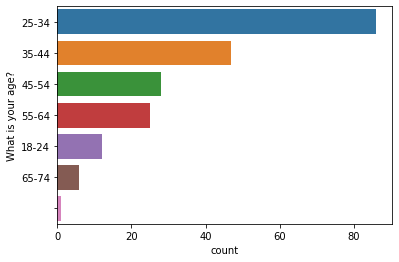

In [14]:
#figures by column 
age_fig=sns.countplot(y=dei['What is your age?'],
                      order=dei['What is your age?'].value_counts().index)
age_fig

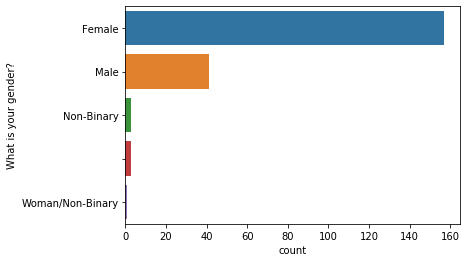

In [15]:

gender_fig = sns.countplot(y=dei['What is your gender?'],
                           order=dei['What is your gender?'].value_counts().index)
gender_fig

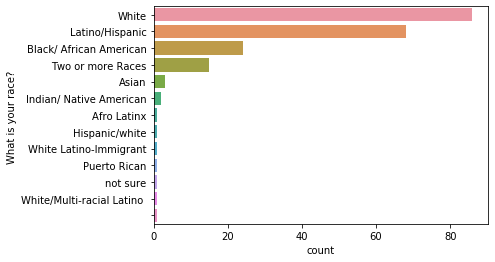

In [16]:
race_fig_1=sns.countplot(y=dei['What is your race? '],
                       order=dei['What is your race? '].value_counts().index)
race_fig_1

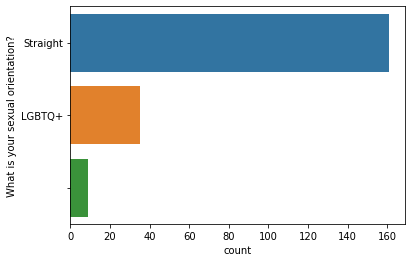

In [17]:
so_fig=sns.countplot(y=dei['What is your sexual orientation?'],
                     order=dei['What is your sexual orientation?'].value_counts().index)
so_fig

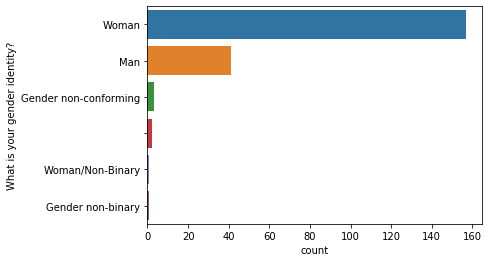

In [18]:
gi_fig=sns.countplot(y=dei['What is your gender identity?'],
                     order=dei['What is your gender identity?'].value_counts().index)
gi_fig

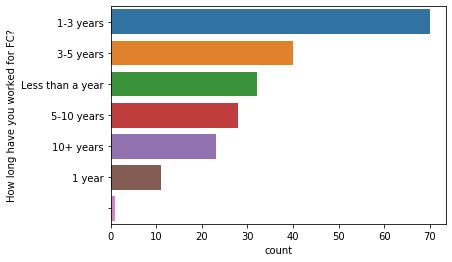

In [19]:
work_years_fig=sns.countplot(y=dei['How long have you worked for FC?'],
                             order=dei['How long have you worked for FC?'].value_counts().index)
work_years_fig

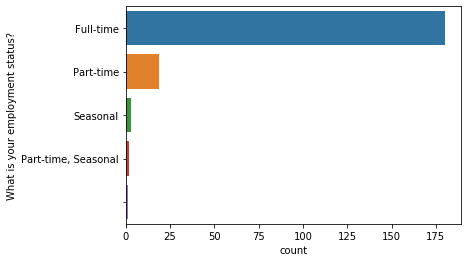

In [20]:
es_fig=sns.countplot(y=dei['What is your employment status?'],
                     order=dei['What is your employment status?'].value_counts().index)
es_fig

In [21]:
'Which DEI efforts would you like to see prioritized at Foundation Communities? (Select your top 3)'

'Which DEI efforts would you like to see prioritized at Foundation Communities? (Select your top 3)'

In [22]:
#dei_efforts_fig = sns.countplot(y=dei['Which DEI efforts would you like to see prioritized at Foundation Communities? (Select your top 3)'],
                     #order=dei['Which DEI efforts would you like to see prioritized at Foundation Communities? (Select your top 3)'].value_counts().index)
#dei_efforts_fig

In [23]:
#when was the sheet last updates
sh.updated

'2020-10-12T19:17:41.593Z'

In [24]:
#!pip install wordcloud

In [25]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")
    plt.savefig("word_cloud3.png",bbox_inches='tight')



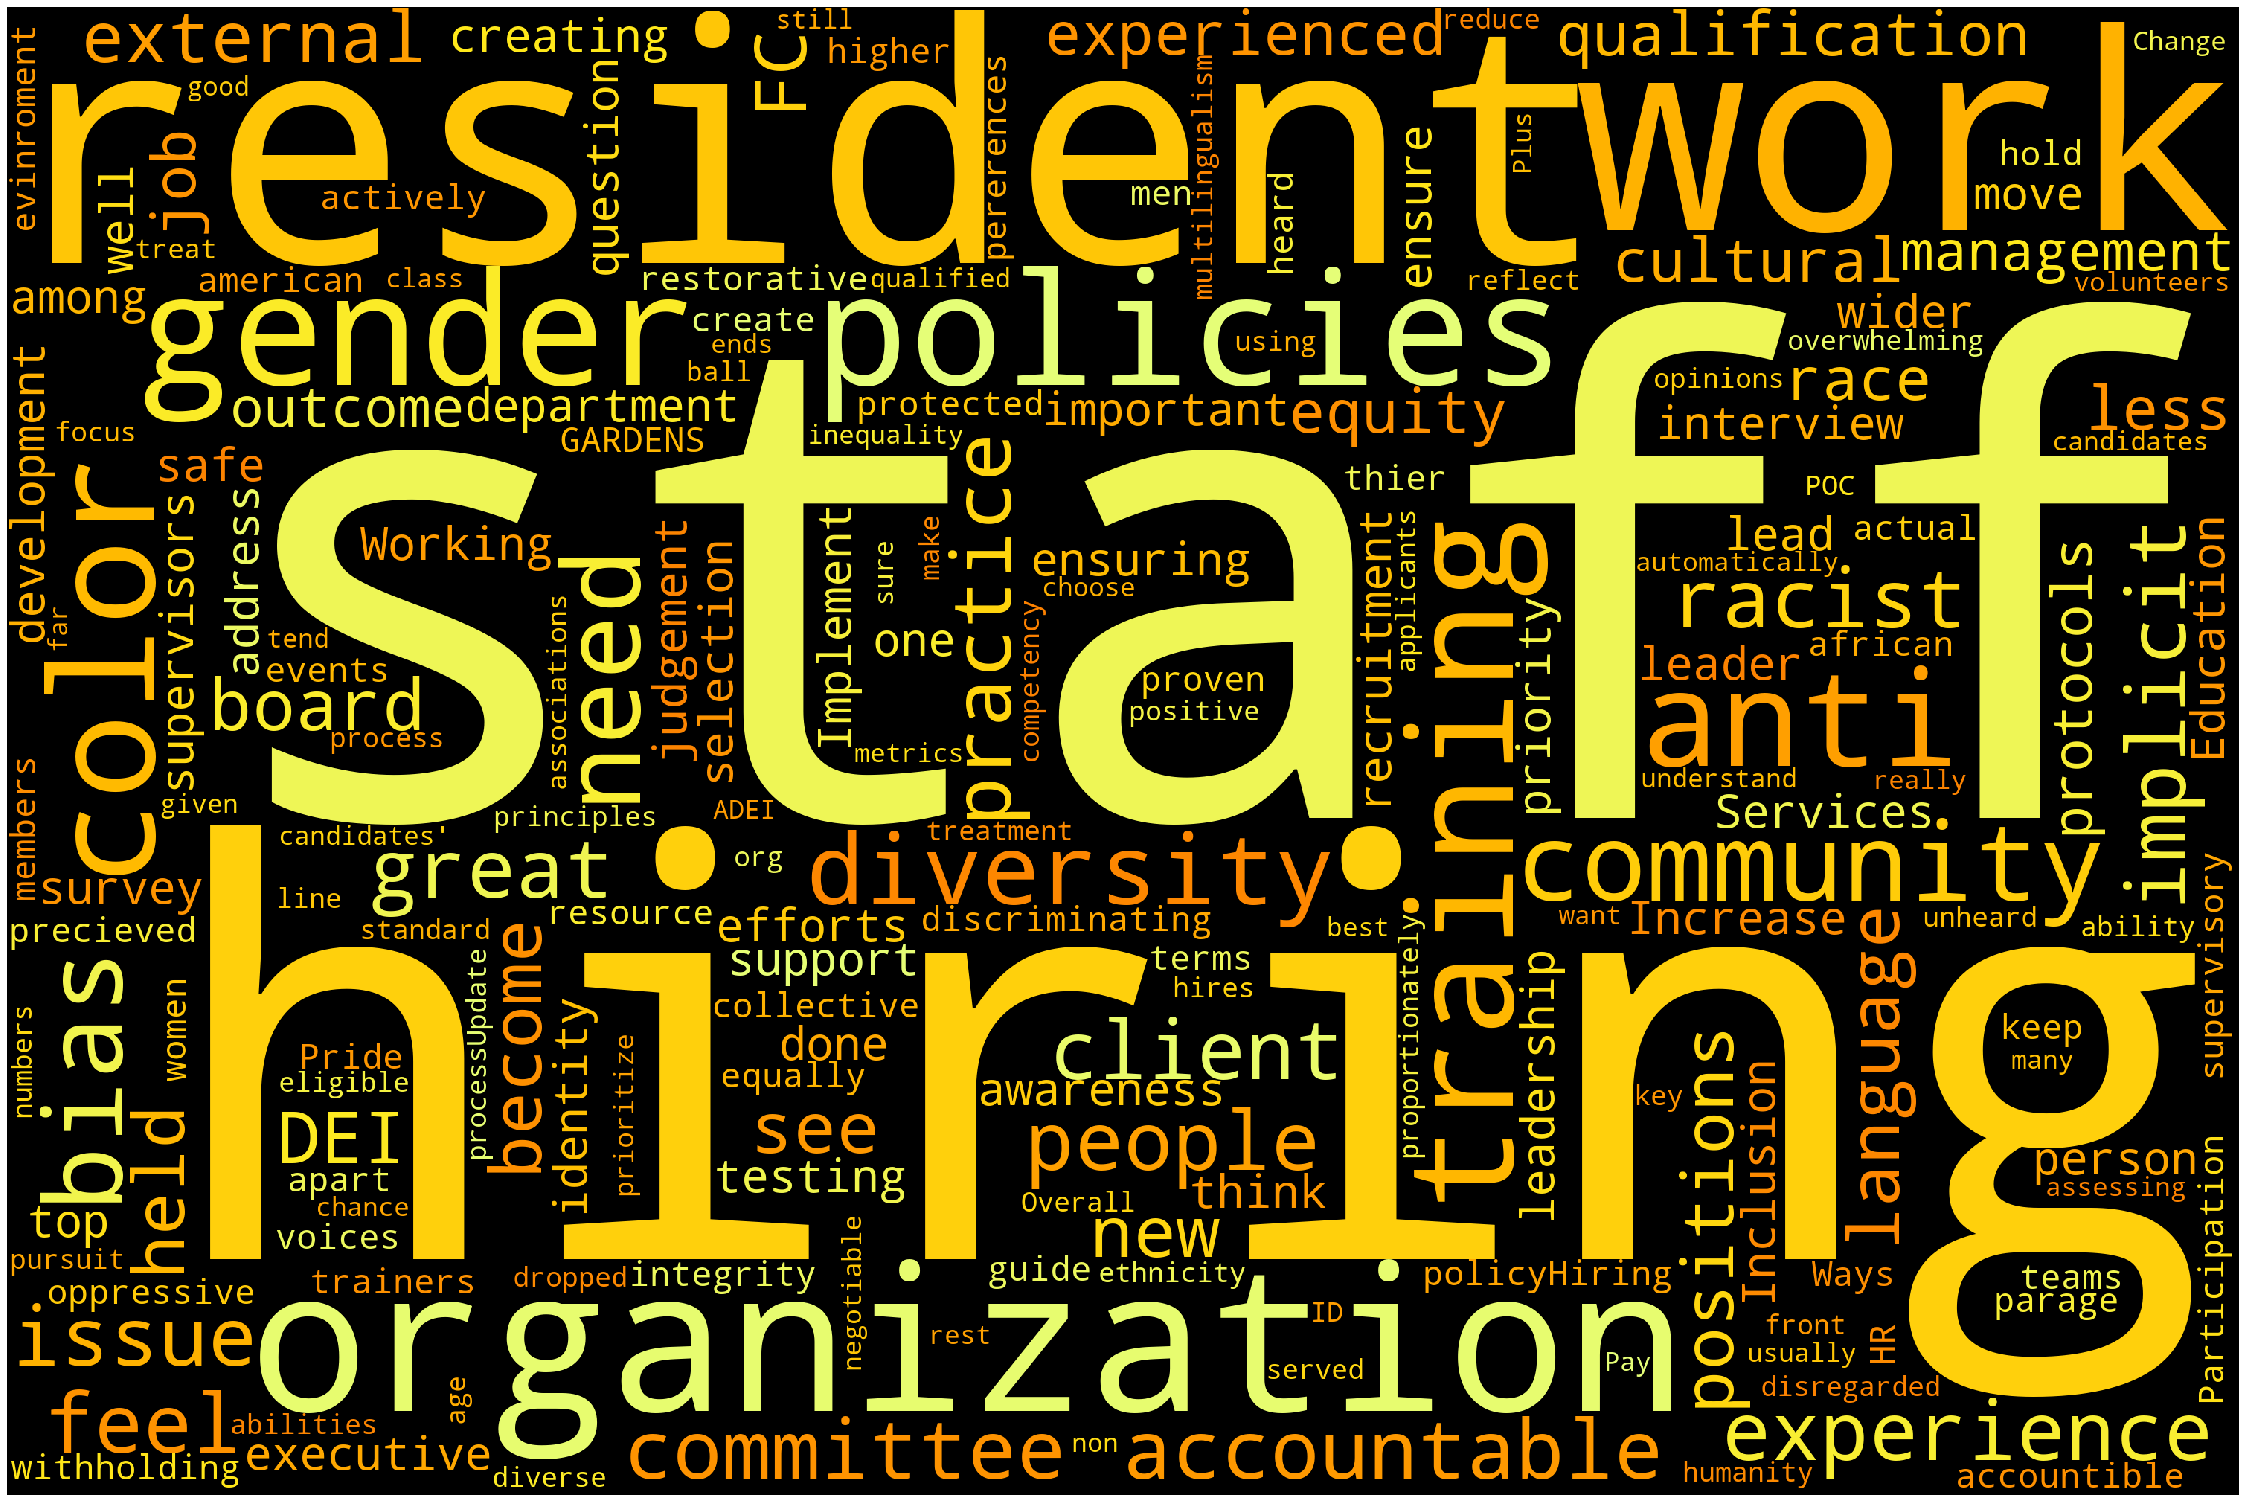

In [26]:
#generate word cloud for open ended question
wordcloud_hc = WordCloud(width=3000, height=2000, random_state=1, background_color='black', colormap='Wistia', collocations=False, stopwords=STOPWORDS).generate(dei["Other (please let us know what other efforts you'd like to see prioritized)"].str.cat())

plot_cloud(wordcloud_hc)

In [27]:
sh.updated

'2020-10-12T19:17:41.593Z'

In [17]:
names=["Female", "Male", "Blank", "Non-Binary", "Woman/Non-Binary"]
for template in ["plotly_dark"]:
    fig = px.pie(dei, values=dei["What is your gender?"].value_counts(), names=names)
    fig.update_traces(textposition='outside')
    fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
    fig.show()



In [29]:
dei["What is your race? "].value_counts()

White                         86
Latino/Hispanic               68
Black/ African American       24
Two or more Races             15
Asian                          3
Indian/ Native American        2
Afro Latinx                    1
Hispanic/white                 1
White Latino-Immigrant         1
Puerto Rican                   1
not sure                       1
White/Multi-racial Latino      1
                               1
Name: What is your race? , dtype: int64

In [30]:
names = ["White", "Latino/Hispanic", "Black/ African American", "Two or more Races", "Asian", "Indian/ Native American", "White Latino-Immigrant", "Puerto Rican", "not sure", "Afro Latinx", "Hispanic/white", "       ", "White/Multi-racial Latino"]
for template in ["plotly_dark"]:
    fig = px.pie(dei, values=dei["What is your race? "].value_counts(), names=names)
    fig.update_traces(textposition='inside')
    fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
    fig.show()

In [31]:
import plotly.express as px
fig = px.histogram(dei, x="What is your age?", color="What is your gender?")
fig.show()

In [32]:
fig = px.histogram(dei, x="What is your age?", color="What is your gender?", #marginal="box", # can be `box`, `violin`
                         hover_data=dei.columns)
fig.show()

In [33]:
for bar in ["plotly_dark"]:
    fig = px.bar(dei, x="What is your age?", color="What is your race? ")
    fig.show()

In [34]:
fig = px.bar(dei, x="How long have you worked for FC?", color="What is your race? ")
fig.show()

In [35]:
dei["Which DEI efforts would you like to see prioritized at Foundation Communities? (Select your top 3)"].value_counts()


Address ways that racial inequity/systemic bias impact issues the organization works on and hold senior team members accountable for anti-racists actions, Increase diverse representation on board and advisory committees, Develop recruitment and hiring protocols and strategies that include implicit bias testing for managers and supervisors                                                                           13
Provide training for staff, leadership, and board, Address ways that racial inequity/systemic bias impact issues the organization works on and hold senior team members accountable for anti-racists actions, Develop recruitment and hiring protocols and strategies that include implicit bias testing for managers and supervisors                                                                                          13
Provide training for staff, leadership, and board, Address ways that racial inequity/systemic bias impact issues the organization works on and hold senior team memb

In [36]:

fig = px.bar(dei, x="Which DEI efforts would you like to see prioritized at Foundation Communities? (Select your top 3)")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [37]:

fig = px.histogram(dei, x="At work, I am treated with respect.  ", color="What is your race? ")
fig.show()

In [38]:
fig = px.histogram(dei, x="At work, I feel comfortable being myself.  ", color="What is your race? ")
fig.show()

In [39]:
fig = px.histogram(dei, x="At work, I feel comfortable being myself.  ", color="What is your gender?")
fig.show()

In [40]:
fig = px.histogram(dei, x="At work, I feel comfortable being myself.  ", color="What is your sexual orientation?")
fig.show()

In [14]:
dei.to_csv(r'DEISurvey', index = False)

In [16]:
dei1 = pd.read_csv("DEISurvey.csv")
dei1

,Timestamp,What is your age?,What is your gender?,What is your race?,What is your sexual orientation?,What is your gender identity?,How long have you worked for FC?,What is your employment status?,Which DEI efforts would you like to see prioritized at Foundation Communities? (Select your top 3),Other (please let us know what other efforts you'd like to see prioritized),...,"At work, I feel comfortable being myself.",Diversity and Inclusiveness issues are openly discussed.,Employees in my organization are treated with respect and dignity.,"Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.",I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.,"If I raised a concern about ethics and integrity, I am confident my employer would do what is right.",My organization treasures diverse opinions and ideas.,My team members appreciate my contributions.,My supervisor tries to understand my point of view.,My workplace is committed to building the strengths of each employee.
0,2020/09/15 11:46:42 AM CDT,45-54,Female,White,NaN,Woman,5-10 years,Full-time,NaN,NaN,...,3,3,3,3.0,3.0,3,3.0,3.0,3.0,3.0
1,2020/09/15 11:46:49 AM CDT,25-34,Male,White,LGBTQ+,Man,1-3 years,Full-time,"Provide training for staff, leadership, and bo...",NaN,...,4,3,4,3.0,2.0,4,4.0,4.0,5.0,3.0
2,2020/09/15 11:47:34 AM CDT,45-54,Male,White,Straight,Man,10+ years,Full-time,Work with external community on race equity/in...,"grow our work on housing, income, wealth, heal...",...,5,5,5,5.0,5.0,5,5.0,5.0,5.0,5.0
3,2020/09/15 11:47:46 AM CDT,25-34,Female,White,LGBTQ+,Woman,3-5 years,Full-time,Address ways that racial inequity/systemic bia...,NaN,...,5,5,4,4.0,4.0,4,3.0,5.0,5.0,4.0
4,2020/09/15 11:47:51 AM CDT,25-34,Female,White,Straight,Woman,1-3 years,Full-time,Address ways that racial inequity/systemic bia...,a mechanism for holding staff accountable is i...,...,4,3,3,3.0,4.0,2,2.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,2020/09/16 9:23:07 AM CDT,45-54,Female,White,Straight,Woman,1-3 years,Full-time,"Provide training for staff, leadership, and bo...",NaN,...,2,3,3,2.0,4.0,4,3.0,3.0,4.0,4.0
105,2020/09/16 10:05:04 AM CDT,25-34,Female,White,Straight,Woman,3-5 years,Full-time,Address ways that racial inequity/systemic bia...,NaN,...,4,5,5,4.0,5.0,3,4.0,5.0,5.0,5.0
106,2020/09/16 11:25:23 AM CDT,55-64,Female,White,Straight,Woman,10+ years,Full-time,"Provide training for staff, leadership, and board",NaN,...,5,5,5,5.0,5.0,5,4.0,5.0,5.0,5.0
107,2020/09/16 11:28:05 AM CDT,35-44,Male,Latino/Hispanic,Straight,Man,10+ years,Full-time,Address ways that racial inequity/systemic bia...,NaN,...,5,4,4,3.0,3.0,3,3.0,5.0,4.0,3.0


In [48]:
dei["What is your race? "].value_counts()


White                         86
Latino/Hispanic               68
Black/ African American       24
Two or more Races             15
Asian                          3
Indian/ Native American        2
Afro Latinx                    1
Hispanic/white                 1
White Latino-Immigrant         1
Puerto Rican                   1
not sure                       1
White/Multi-racial Latino      1
                               1
Name: What is your race? , dtype: int64

In [50]:
dei["What is your age?"].value_counts()

25-34    86
35-44    47
45-54    28
55-64    25
18-24    12
65-74     6
          1
Name: What is your age?, dtype: int64

In [51]:
dei["What is your sexual orientation?"].value_counts()

Straight    161
LGBTQ+       35
              9
Name: What is your sexual orientation?, dtype: int64

In [85]:
dei["How long have you worked for FC?"].value_counts()

1-3 years           70
3-5 years           40
Less than a year    32
5-10 years          28
10+ years           23
1 year              11
                     1
Name: How long have you worked for FC?, dtype: int64

In [88]:
dei['What is your employment status?'].value_counts()

Full-time              180
Part-time               19
Seasonal                 3
Part-time, Seasonal      2
                         1
Name: What is your employment status?, dtype: int64

In [106]:
#At work, I am treated with respect.
#defining list_updatemenus
list_updatemenus = [{'label': 'Total',
                     'method': 'update',
                     'args': [{'visible': [True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'At work, I am treated with respect.'}]},
                    {'label': 'Race',
                     'method': 'update',
                     'args': [{'visible': [False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'At work, I am treated with respect.'}]},
                    {'label': 'Age',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'At work, I am treated with respect.'}]},
                    {'label': 'Sexual Orientation',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False]}, {'title': 'At work, I am treated with respect.'}]},
                   {'label': 'Tenure',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False, False]}, {'title': 'At work, I am treated with respect.'}]},
                   {'label': 'Status',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True]}, {'title': 'At work, I am treated with respect.'}]}
                   ]
#defining graph objects
x_total = dei['At work, I am treated with respect.  ']
x_white = dei[dei['What is your race? ']=="White"]["At work, I am treated with respect.  "]
x_latinx = dei[dei['What is your race? ']=="Latino/Hispanic"]["At work, I am treated with respect.  "]
x_black = dei[dei['What is your race? ']=="Black/ African American"]["At work, I am treated with respect.  "]
x_two_plus = dei[dei['What is your race? ']=="Two or more Races"]["At work, I am treated with respect.  "]
x_asian = dei[dei['What is your race? ']=="Asian"]["At work, I am treated with respect.  "]
x_first_peoples = dei[dei['What is your race? ']=="Indian/ Native American"]["At work, I am treated with respect.  "]
x_age1 = dei[dei["What is your age?"]=="25-34"]["At work, I am treated with respect.  "]
x_age2 = dei[dei["What is your age?"]=="35-44"]["At work, I am treated with respect.  "]
x_age3 = dei[dei["What is your age?"]=="45-54"]["At work, I am treated with respect.  "]
x_age4 = dei[dei["What is your age?"]=="55-64"]["At work, I am treated with respect.  "]
x_age5 = dei[dei["What is your age?"]=="18-24"]["At work, I am treated with respect.  "]
x_age6 = dei[dei["What is your age?"]=="65-74"]["At work, I am treated with respect.  "]
x_straight = dei[dei["What is your sexual orientation?"]=="Straight"]["At work, I am treated with respect.  "]
x_lgbtq = dei[dei["What is your sexual orientation?"]=="LGBTQ+"]["At work, I am treated with respect.  "]
x_tenure1 = dei[dei["How long have you worked for FC?"]=="1-3 years"]["At work, I am treated with respect.  "]
x_tenure2 = dei[dei["How long have you worked for FC?"]=="3-5 years"]["At work, I am treated with respect.  "]
x_tenure3 = dei[dei["How long have you worked for FC?"]=="Less than a year"]["At work, I am treated with respect.  "]
x_tenure4 = dei[dei["How long have you worked for FC?"]=="5-10 years"]["At work, I am treated with respect.  "]
x_tenure5 = dei[dei["How long have you worked for FC?"]=="10+ years"]["At work, I am treated with respect.  "]
x_tenure6 = dei[dei["How long have you worked for FC?"]=="1 year"]["At work, I am treated with respect.  "]
x_status1 = dei[dei["What is your employment status?"]=="Full-time"]["At work, I am treated with respect.  "]
x_status2 = dei[dei["What is your employment status?"]=="Part-time"]["At work, I am treated with respect.  "]
x_status3 = dei[dei["What is your employment status?"]=="Seasonal"]["At work, I am treated with respect.  "]
x_status4 = dei[dei["What is your employment status?"]=="Part-time, Seasonal"]["At work, I am treated with respect.  "]
#defining data
data=[go.Histogram(x=x_total,name='  ',opacity = .5),
      go.Histogram(x=x_white,name='White',opacity = .5),
      go.Histogram(x=x_latinx,name='Latino/Hispanic',opacity = .5),
      go.Histogram(x=x_black,name='Black/African American',opacity = .5),
      go.Histogram(x=x_two_plus,name='Two or more Races',opacity = .5),
      go.Histogram(x=x_asian,name='Asian',opacity = .5),
      go.Histogram(x=x_first_peoples,name='Indian/Native American',opacity = .5),
      go.Histogram(x=x_age1,name='25-34', opacity = .5),
      go.Histogram(x=x_age2,name='35-44',opacity = .5),
      go.Histogram(x=x_age3,name='45-54',opacity = .5),
      go.Histogram(x=x_age4,name='55-64',opacity = .5),
      go.Histogram(x=x_age5,name='18-24',opacity = .5),
      go.Histogram(x=x_age6,name='65-74',opacity = .5),
      go.Histogram(x=x_straight,name='Straight',opacity = .5),
      go.Histogram(x=x_lgbtq,name='LGBTQ+',opacity = .5),
      go.Histogram(x=x_tenure1,name='1-3 years',opacity = .5),
      go.Histogram(x=x_tenure2,name='3-5 years',opacity = .5),
      go.Histogram(x=x_tenure3,name='< than a year',opacity = .5),
      go.Histogram(x=x_tenure4,name='5-10 years',opacity = .5),
      go.Histogram(x=x_tenure5,name='10+ years',opacity = .5),
      go.Histogram(x=x_tenure6,name='1 year',opacity = .5),
      go.Histogram(x=x_status1,name='Full-time',opacity = .5),
      go.Histogram(x=x_status2,name='Part-time',opacity = .5),
      go.Histogram(x=x_status2,name='Seasonal',opacity = .5),
      go.Histogram(x=x_status2,name='Part-time, Seasonal',opacity = .5)
     
     ]


#defining layout
layout=go.Layout(title='At work, I am treated with respect.',updatemenus=list([dict(buttons= list_updatemenus,type = 'buttons')]),barmode='stack')

#defining layout and plotting
fig = go.Figure(data,layout)
fig.show()


In [110]:
#At work, I feel comfortable being myself.  
#defining list_updatemenus
list_updatemenus = [{'label': 'Total',
                     'method': 'update',
                     'args': [{'visible': [True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'At work, I feel comfortable being myself.'}]},
                    {'label': 'Race',
                     'method': 'update',
                     'args': [{'visible': [False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'At work, I feel comfortable being myself.'}]},
                    {'label': 'Age',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'At work, I feel comfortable being myself.'}]},
                    {'label': 'Sexual Orientation',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False]}, {'title': 'At work, I feel comfortable being myself.'}]},
                   {'label': 'Tenure',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False, False]}, {'title': 'At work, I feel comfortable being myself.'}]},
                   {'label': 'Status',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True]}, {'title': 'At work, I feel comfortable being myself.'}]}
                   ]
#defining graph objects
x_total = dei['At work, I feel comfortable being myself.  ']
x_white = dei[dei['What is your race? ']=="White"]["At work, I feel comfortable being myself.  "]
x_latinx = dei[dei['What is your race? ']=="Latino/Hispanic"]["At work, I feel comfortable being myself.  "]
x_black = dei[dei['What is your race? ']=="Black/ African American"]["At work, I feel comfortable being myself.  "]
x_two_plus = dei[dei['What is your race? ']=="Two or more Races"]["At work, I feel comfortable being myself.  "]
x_asian = dei[dei['What is your race? ']=="Asian"]["At work, I feel comfortable being myself.  "]
x_first_peoples = dei[dei['What is your race? ']=="Indian/ Native American"]["At work, I feel comfortable being myself.  "]
x_age1 = dei[dei["What is your age?"]=="25-34"]["At work, I feel comfortable being myself.  "]
x_age2 = dei[dei["What is your age?"]=="35-44"]["At work, I feel comfortable being myself.  "]
x_age3 = dei[dei["What is your age?"]=="45-54"]["At work, I feel comfortable being myself.  "]
x_age4 = dei[dei["What is your age?"]=="55-64"]["At work, I feel comfortable being myself.  "]
x_age5 = dei[dei["What is your age?"]=="18-24"]["At work, I feel comfortable being myself.  "]
x_age6 = dei[dei["What is your age?"]=="65-74"]["At work, I feel comfortable being myself.  "]
x_straight = dei[dei["What is your sexual orientation?"]=="Straight"]["At work, I feel comfortable being myself.  "]
x_lgbtq = dei[dei["What is your sexual orientation?"]=="LGBTQ+"]["At work, I feel comfortable being myself.  "]
x_tenure1 = dei[dei["How long have you worked for FC?"]=="1-3 years"]["At work, I feel comfortable being myself.  "]
x_tenure2 = dei[dei["How long have you worked for FC?"]=="3-5 years"]["At work, I feel comfortable being myself.  "]
x_tenure3 = dei[dei["How long have you worked for FC?"]=="Less than a year"]["At work, I feel comfortable being myself.  "]
x_tenure4 = dei[dei["How long have you worked for FC?"]=="5-10 years"]["At work, I feel comfortable being myself.  "]
x_tenure5 = dei[dei["How long have you worked for FC?"]=="10+ years"]["At work, I feel comfortable being myself.  "]
x_tenure6 = dei[dei["How long have you worked for FC?"]=="1 year"]["At work, I feel comfortable being myself.  "]
x_status1 = dei[dei["What is your employment status?"]=="Full-time"]["At work, I feel comfortable being myself.  "]
x_status2 = dei[dei["What is your employment status?"]=="Part-time"]["At work, I feel comfortable being myself.  "]
x_status3 = dei[dei["What is your employment status?"]=="Seasonal"]["At work, I feel comfortable being myself.  "]
x_status4 = dei[dei["What is your employment status?"]=="Part-time, Seasonal"]["At work, I feel comfortable being myself.  "]
#defining data
data=[go.Histogram(x=x_total,name='   ',opacity = .5),
      go.Histogram(x=x_white,name='White',opacity = .5),
      go.Histogram(x=x_latinx,name='Latino/Hispanic',opacity = .5),
      go.Histogram(x=x_black,name='Black/African American',opacity = .5),
      go.Histogram(x=x_two_plus,name='Two or more Races',opacity = .5),
      go.Histogram(x=x_asian,name='Asian',opacity = .5),
      go.Histogram(x=x_first_peoples,name='Indian/Native American',opacity = .5),
      go.Histogram(x=x_age1,name='25-34', opacity = .5),
      go.Histogram(x=x_age2,name='35-44',opacity = .5),
      go.Histogram(x=x_age3,name='45-54',opacity = .5),
      go.Histogram(x=x_age4,name='55-64',opacity = .5),
      go.Histogram(x=x_age5,name='18-24',opacity = .5),
      go.Histogram(x=x_age6,name='65-74',opacity = .5),
      go.Histogram(x=x_straight,name='Straight',opacity = .5),
      go.Histogram(x=x_lgbtq,name='LGBTQ+',opacity = .5),
      go.Histogram(x=x_tenure1,name='1-3 years',opacity = .5),
      go.Histogram(x=x_tenure2,name='3-5 years',opacity = .5),
      go.Histogram(x=x_tenure3,name='< than a year',opacity = .5),
      go.Histogram(x=x_tenure4,name='5-10 years',opacity = .5),
      go.Histogram(x=x_tenure5,name='10+ years',opacity = .5),
      go.Histogram(x=x_tenure6,name='1 year',opacity = .5),
      go.Histogram(x=x_status1,name='Full-time',opacity = .5),
      go.Histogram(x=x_status2,name='Part-time',opacity = .5),
      go.Histogram(x=x_status2,name='Seasonal',opacity = .5),
      go.Histogram(x=x_status2,name='Part-time, Seasonal',opacity = .5)
     
     ]


#defining layout
layout=go.Layout(title='At work, I feel comfortable being myself.',updatemenus=list([dict(buttons= list_updatemenus,type = 'buttons')]),barmode='stack')

#defining layout and plotting
fig = go.Figure(data,layout)
fig.show()

In [111]:
#Employees in my organization are treated with respect and dignity.  
#defining list_updatemenus
list_updatemenus = [{'label': 'Total',
                     'method': 'update',
                     'args': [{'visible': [True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'Employees in my organization are treated with respect and dignity.'}]},
                    {'label': 'Race',
                     'method': 'update',
                     'args': [{'visible': [False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'Employees in my organization are treated with respect and dignity.'}]},
                    {'label': 'Age',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'Employees in my organization are treated with respect and dignity.'}]},
                    {'label': 'Sexual Orientation',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False]}, {'title': 'Employees in my organization are treated with respect and dignity.'}]},
                   {'label': 'Tenure',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False, False]}, {'title': 'Employees in my organization are treated with respect and dignity.'}]},
                   {'label': 'Status',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True]}, {'title': 'Employees in my organization are treated with respect and dignity.'}]}
                   ]
#defining graph objects
x_total = dei["Employees in my organization are treated with respect and dignity.  "]
x_white = dei[dei['What is your race? ']=="White"]["Employees in my organization are treated with respect and dignity.  "]
x_latinx = dei[dei['What is your race? ']=="Latino/Hispanic"]["Employees in my organization are treated with respect and dignity.  "]
x_black = dei[dei['What is your race? ']=="Black/ African American"]["Employees in my organization are treated with respect and dignity.  "]
x_two_plus = dei[dei['What is your race? ']=="Two or more Races"]["Employees in my organization are treated with respect and dignity.  "]
x_asian = dei[dei['What is your race? ']=="Asian"]["Employees in my organization are treated with respect and dignity.  "]
x_first_peoples = dei[dei['What is your race? ']=="Indian/ Native American"]["Employees in my organization are treated with respect and dignity.  "]
x_age1 = dei[dei["What is your age?"]=="25-34"]["Employees in my organization are treated with respect and dignity.  "]
x_age2 = dei[dei["What is your age?"]=="35-44"]["Employees in my organization are treated with respect and dignity.  "]
x_age3 = dei[dei["What is your age?"]=="45-54"]["Employees in my organization are treated with respect and dignity.  "]
x_age4 = dei[dei["What is your age?"]=="55-64"]["Employees in my organization are treated with respect and dignity.  "]
x_age5 = dei[dei["What is your age?"]=="18-24"]["Employees in my organization are treated with respect and dignity.  "]
x_age6 = dei[dei["What is your age?"]=="65-74"]["Employees in my organization are treated with respect and dignity.  "]
x_straight = dei[dei["What is your sexual orientation?"]=="Straight"]["Employees in my organization are treated with respect and dignity.  "]
x_lgbtq = dei[dei["What is your sexual orientation?"]=="LGBTQ+"]["Employees in my organization are treated with respect and dignity.  "]
x_tenure1 = dei[dei["How long have you worked for FC?"]=="1-3 years"]["Employees in my organization are treated with respect and dignity.  "]
x_tenure2 = dei[dei["How long have you worked for FC?"]=="3-5 years"]["Employees in my organization are treated with respect and dignity.  "]
x_tenure3 = dei[dei["How long have you worked for FC?"]=="Less than a year"]["Employees in my organization are treated with respect and dignity.  "]
x_tenure4 = dei[dei["How long have you worked for FC?"]=="5-10 years"]["Employees in my organization are treated with respect and dignity.  "]
x_tenure5 = dei[dei["How long have you worked for FC?"]=="10+ years"]["Employees in my organization are treated with respect and dignity.  "]
x_tenure6 = dei[dei["How long have you worked for FC?"]=="1 year"]["Employees in my organization are treated with respect and dignity.  "]
x_status1 = dei[dei["What is your employment status?"]=="Full-time"]["Employees in my organization are treated with respect and dignity.  "]
x_status2 = dei[dei["What is your employment status?"]=="Part-time"]["Employees in my organization are treated with respect and dignity.  "]
x_status3 = dei[dei["What is your employment status?"]=="Seasonal"]["Employees in my organization are treated with respect and dignity.  "]
x_status4 = dei[dei["What is your employment status?"]=="Part-time, Seasonal"]["Employees in my organization are treated with respect and dignity.  "]
#defining data
data=[go.Histogram(x=x_total,name='   ',opacity = .5),
      go.Histogram(x=x_white,name='White',opacity = .5),
      go.Histogram(x=x_latinx,name='Latino/Hispanic',opacity = .5),
      go.Histogram(x=x_black,name='Black/African American',opacity = .5),
      go.Histogram(x=x_two_plus,name='Two or more Races',opacity = .5),
      go.Histogram(x=x_asian,name='Asian',opacity = .5),
      go.Histogram(x=x_first_peoples,name='Indian/Native American',opacity = .5),
      go.Histogram(x=x_age1,name='25-34', opacity = .5),
      go.Histogram(x=x_age2,name='35-44',opacity = .5),
      go.Histogram(x=x_age3,name='45-54',opacity = .5),
      go.Histogram(x=x_age4,name='55-64',opacity = .5),
      go.Histogram(x=x_age5,name='18-24',opacity = .5),
      go.Histogram(x=x_age6,name='65-74',opacity = .5),
      go.Histogram(x=x_straight,name='Straight',opacity = .5),
      go.Histogram(x=x_lgbtq,name='LGBTQ+',opacity = .5),
      go.Histogram(x=x_tenure1,name='1-3 years',opacity = .5),
      go.Histogram(x=x_tenure2,name='3-5 years',opacity = .5),
      go.Histogram(x=x_tenure3,name='< than a year',opacity = .5),
      go.Histogram(x=x_tenure4,name='5-10 years',opacity = .5),
      go.Histogram(x=x_tenure5,name='10+ years',opacity = .5),
      go.Histogram(x=x_tenure6,name='1 year',opacity = .5),
      go.Histogram(x=x_status1,name='Full-time',opacity = .5),
      go.Histogram(x=x_status2,name='Part-time',opacity = .5),
      go.Histogram(x=x_status2,name='Seasonal',opacity = .5),
      go.Histogram(x=x_status2,name='Part-time, Seasonal',opacity = .5)
     
     ]


#defining layout
layout=go.Layout(title='Employees in my organization are treated with respect and dignity.',updatemenus=list([dict(buttons= list_updatemenus,type = 'buttons')]),barmode='stack')

#defining layout and plotting
fig = go.Figure(data,layout)
fig.show()

In [112]:
#Diversity and Inclusiveness issues are openly discussed.    
#defining list_updatemenus
list_updatemenus = [{'label': 'Total',
                     'method': 'update',
                     'args': [{'visible': [True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'Employees in my organization are treated with respect and dignity.'}]},
                    {'label': 'Race',
                     'method': 'update',
                     'args': [{'visible': [False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'Diversity and Inclusiveness issues are openly discussed.'}]},
                    {'label': 'Age',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'Diversity and Inclusiveness issues are openly discussed.'}]},
                    {'label': 'Sexual Orientation',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False]}, {'title': 'Diversity and Inclusiveness issues are openly discussed.'}]},
                   {'label': 'Tenure',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False, False]}, {'title': 'Diversity and Inclusiveness issues are openly discussed.  '}]},
                   {'label': 'Status',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True]}, {'title': 'Diversity and Inclusiveness issues are openly discussed.  '}]}
                   ]
#defining graph objects
x_total = dei["Diversity and Inclusiveness issues are openly discussed.  "]
x_white = dei[dei['What is your race? ']=="White"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_latinx = dei[dei['What is your race? ']=="Latino/Hispanic"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_black = dei[dei['What is your race? ']=="Black/ African American"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_two_plus = dei[dei['What is your race? ']=="Two or more Races"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_asian = dei[dei['What is your race? ']=="Asian"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_first_peoples = dei[dei['What is your race? ']=="Indian/ Native American"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_age1 = dei[dei["What is your age?"]=="25-34"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_age2 = dei[dei["What is your age?"]=="35-44"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_age3 = dei[dei["What is your age?"]=="45-54"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_age4 = dei[dei["What is your age?"]=="55-64"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_age5 = dei[dei["What is your age?"]=="18-24"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_age6 = dei[dei["What is your age?"]=="65-74"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_straight = dei[dei["What is your sexual orientation?"]=="Straight"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_lgbtq = dei[dei["What is your sexual orientation?"]=="LGBTQ+"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_tenure1 = dei[dei["How long have you worked for FC?"]=="1-3 years"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_tenure2 = dei[dei["How long have you worked for FC?"]=="3-5 years"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_tenure3 = dei[dei["How long have you worked for FC?"]=="Less than a year"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_tenure4 = dei[dei["How long have you worked for FC?"]=="5-10 years"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_tenure5 = dei[dei["How long have you worked for FC?"]=="10+ years"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_tenure6 = dei[dei["How long have you worked for FC?"]=="1 year"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_status1 = dei[dei["What is your employment status?"]=="Full-time"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_status2 = dei[dei["What is your employment status?"]=="Part-time"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_status3 = dei[dei["What is your employment status?"]=="Seasonal"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_status4 = dei[dei["What is your employment status?"]=="Part-time, Seasonal"]["Diversity and Inclusiveness issues are openly discussed.  "]
#defining data
data=[go.Histogram(x=x_total,name='   ',opacity = .5),
      go.Histogram(x=x_white,name='White',opacity = .5),
      go.Histogram(x=x_latinx,name='Latino/Hispanic',opacity = .5),
      go.Histogram(x=x_black,name='Black/African American',opacity = .5),
      go.Histogram(x=x_two_plus,name='Two or more Races',opacity = .5),
      go.Histogram(x=x_asian,name='Asian',opacity = .5),
      go.Histogram(x=x_first_peoples,name='Indian/Native American',opacity = .5),
      go.Histogram(x=x_age1,name='25-34', opacity = .5),
      go.Histogram(x=x_age2,name='35-44',opacity = .5),
      go.Histogram(x=x_age3,name='45-54',opacity = .5),
      go.Histogram(x=x_age4,name='55-64',opacity = .5),
      go.Histogram(x=x_age5,name='18-24',opacity = .5),
      go.Histogram(x=x_age6,name='65-74',opacity = .5),
      go.Histogram(x=x_straight,name='Straight',opacity = .5),
      go.Histogram(x=x_lgbtq,name='LGBTQ+',opacity = .5),
      go.Histogram(x=x_tenure1,name='1-3 years',opacity = .5),
      go.Histogram(x=x_tenure2,name='3-5 years',opacity = .5),
      go.Histogram(x=x_tenure3,name='< than a year',opacity = .5),
      go.Histogram(x=x_tenure4,name='5-10 years',opacity = .5),
      go.Histogram(x=x_tenure5,name='10+ years',opacity = .5),
      go.Histogram(x=x_tenure6,name='1 year',opacity = .5),
      go.Histogram(x=x_status1,name='Full-time',opacity = .5),
      go.Histogram(x=x_status2,name='Part-time',opacity = .5),
      go.Histogram(x=x_status2,name='Seasonal',opacity = .5),
      go.Histogram(x=x_status2,name='Part-time, Seasonal',opacity = .5)
     
     ]


#defining layout
layout=go.Layout(title='Diversity and Inclusiveness issues are openly discussed.',updatemenus=list([dict(buttons= list_updatemenus,type = 'buttons')]),barmode='stack')

#defining layout and plotting
fig = go.Figure(data,layout)
fig.show()

In [114]:
#Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  
#defining list_updatemenus
list_updatemenus = [{'label': 'Total',
                     'method': 'update',
                     'args': [{'visible': [True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.'}]},
                    {'label': 'Race',
                     'method': 'update',
                     'args': [{'visible': [False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.'}]},
                    {'label': 'Age',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.'}]},
                    {'label': 'Sexual Orientation',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False]}, {'title': 'Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.'}]},
                   {'label': 'Tenure',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False, False]}, {'title': 'Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  '}]},
                   {'label': 'Status',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True]}, {'title': 'Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  '}]}
                   ]
#defining graph objects
x_total = dei["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_white = dei[dei['What is your race? ']=="White"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_latinx = dei[dei['What is your race? ']=="Latino/Hispanic"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_black = dei[dei['What is your race? ']=="Black/ African American"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_two_plus = dei[dei['What is your race? ']=="Two or more Races"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_asian = dei[dei['What is your race? ']=="Asian"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_first_peoples = dei[dei['What is your race? ']=="Indian/ Native American"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_age1 = dei[dei["What is your age?"]=="25-34"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_age2 = dei[dei["What is your age?"]=="35-44"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_age3 = dei[dei["What is your age?"]=="45-54"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_age4 = dei[dei["What is your age?"]=="55-64"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_age5 = dei[dei["What is your age?"]=="18-24"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_age6 = dei[dei["What is your age?"]=="65-74"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_straight = dei[dei["What is your sexual orientation?"]=="Straight"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_lgbtq = dei[dei["What is your sexual orientation?"]=="LGBTQ+"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_tenure1 = dei[dei["How long have you worked for FC?"]=="1-3 years"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_tenure2 = dei[dei["How long have you worked for FC?"]=="3-5 years"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_tenure3 = dei[dei["How long have you worked for FC?"]=="Less than a year"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_tenure4 = dei[dei["How long have you worked for FC?"]=="5-10 years"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_tenure5 = dei[dei["How long have you worked for FC?"]=="10+ years"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_tenure6 = dei[dei["How long have you worked for FC?"]=="1 year"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_status1 = dei[dei["What is your employment status?"]=="Full-time"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_status2 = dei[dei["What is your employment status?"]=="Part-time"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_status3 = dei[dei["What is your employment status?"]=="Seasonal"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_status4 = dei[dei["What is your employment status?"]=="Part-time, Seasonal"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
#defining data
data=[go.Histogram(x=x_total,name='  ',opacity = .5),
      go.Histogram(x=x_white,name='White',opacity = .5),
      go.Histogram(x=x_latinx,name='Latino/Hispanic',opacity = .5),
      go.Histogram(x=x_black,name='Black/African American',opacity = .5),
      go.Histogram(x=x_two_plus,name='Two or more Races',opacity = .5),
      go.Histogram(x=x_asian,name='Asian',opacity = .5),
      go.Histogram(x=x_first_peoples,name='Indian/Native American',opacity = .5),
      go.Histogram(x=x_age1,name='25-34', opacity = .5),
      go.Histogram(x=x_age2,name='35-44',opacity = .5),
      go.Histogram(x=x_age3,name='45-54',opacity = .5),
      go.Histogram(x=x_age4,name='55-64',opacity = .5),
      go.Histogram(x=x_age5,name='18-24',opacity = .5),
      go.Histogram(x=x_age6,name='65-74',opacity = .5),
      go.Histogram(x=x_straight,name='Straight',opacity = .5),
      go.Histogram(x=x_lgbtq,name='LGBTQ+',opacity = .5),
      go.Histogram(x=x_tenure1,name='1-3 years',opacity = .5),
      go.Histogram(x=x_tenure2,name='3-5 years',opacity = .5),
      go.Histogram(x=x_tenure3,name='< than a year',opacity = .5),
      go.Histogram(x=x_tenure4,name='5-10 years',opacity = .5),
      go.Histogram(x=x_tenure5,name='10+ years',opacity = .5),
      go.Histogram(x=x_tenure6,name='1 year',opacity = .5),
      go.Histogram(x=x_status1,name='Full-time',opacity = .5),
      go.Histogram(x=x_status2,name='Part-time',opacity = .5),
      go.Histogram(x=x_status2,name='Seasonal',opacity = .5),
      go.Histogram(x=x_status2,name='Part-time, Seasonal',opacity = .5)
     
     ]


#defining layout
layout=go.Layout(title='Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.',updatemenus=list([dict(buttons= list_updatemenus,type = 'buttons')]),barmode='stack')

#defining layout and plotting
fig = go.Figure(data,layout)
fig.show()

In [115]:
#I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  
#defining list_updatemenus
list_updatemenus = [{'label': 'Total',
                     'method': 'update',
                     'args': [{'visible': [True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.'}]},
                    {'label': 'Race',
                     'method': 'update',
                     'args': [{'visible': [False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.'}]},
                    {'label': 'Age',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.'}]},
                    {'label': 'Sexual Orientation',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False]}, {'title': 'I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.'}]},
                   {'label': 'Tenure',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False, False]}, {'title': 'I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.'}]},
                   {'label': 'Status',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True]}, {'title': 'I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.'}]}
                   ]
#defining graph objects
x_total = dei["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_white = dei[dei['What is your race? ']=="White"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_latinx = dei[dei['What is your race? ']=="Latino/Hispanic"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_black = dei[dei['What is your race? ']=="Black/ African American"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_two_plus = dei[dei['What is your race? ']=="Two or more Races"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_asian = dei[dei['What is your race? ']=="Asian"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_first_peoples = dei[dei['What is your race? ']=="Indian/ Native American"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_age1 = dei[dei["What is your age?"]=="25-34"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_age2 = dei[dei["What is your age?"]=="35-44"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_age3 = dei[dei["What is your age?"]=="45-54"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_age4 = dei[dei["What is your age?"]=="55-64"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_age5 = dei[dei["What is your age?"]=="18-24"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_age6 = dei[dei["What is your age?"]=="65-74"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_straight = dei[dei["What is your sexual orientation?"]=="Straight"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_lgbtq = dei[dei["What is your sexual orientation?"]=="LGBTQ+"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_tenure1 = dei[dei["How long have you worked for FC?"]=="1-3 years"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_tenure2 = dei[dei["How long have you worked for FC?"]=="3-5 years"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_tenure3 = dei[dei["How long have you worked for FC?"]=="Less than a year"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_tenure4 = dei[dei["How long have you worked for FC?"]=="5-10 years"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_tenure5 = dei[dei["How long have you worked for FC?"]=="10+ years"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_tenure6 = dei[dei["How long have you worked for FC?"]=="1 year"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_status1 = dei[dei["What is your employment status?"]=="Full-time"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_status2 = dei[dei["What is your employment status?"]=="Part-time"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_status3 = dei[dei["What is your employment status?"]=="Seasonal"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_status4 = dei[dei["What is your employment status?"]=="Part-time, Seasonal"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
#defining data
data=[go.Histogram(x=x_total,name='   ',opacity = .5),
      go.Histogram(x=x_white,name='White',opacity = .5),
      go.Histogram(x=x_latinx,name='Latino/Hispanic',opacity = .5),
      go.Histogram(x=x_black,name='Black/African American',opacity = .5),
      go.Histogram(x=x_two_plus,name='Two or more Races',opacity = .5),
      go.Histogram(x=x_asian,name='Asian',opacity = .5),
      go.Histogram(x=x_first_peoples,name='Indian/Native American',opacity = .5),
      go.Histogram(x=x_age1,name='25-34', opacity = .5),
      go.Histogram(x=x_age2,name='35-44',opacity = .5),
      go.Histogram(x=x_age3,name='45-54',opacity = .5),
      go.Histogram(x=x_age4,name='55-64',opacity = .5),
      go.Histogram(x=x_age5,name='18-24',opacity = .5),
      go.Histogram(x=x_age6,name='65-74',opacity = .5),
      go.Histogram(x=x_straight,name='Straight',opacity = .5),
      go.Histogram(x=x_lgbtq,name='LGBTQ+',opacity = .5),
      go.Histogram(x=x_tenure1,name='1-3 years',opacity = .5),
      go.Histogram(x=x_tenure2,name='3-5 years',opacity = .5),
      go.Histogram(x=x_tenure3,name='< than a year',opacity = .5),
      go.Histogram(x=x_tenure4,name='5-10 years',opacity = .5),
      go.Histogram(x=x_tenure5,name='10+ years',opacity = .5),
      go.Histogram(x=x_tenure6,name='1 year',opacity = .5),
      go.Histogram(x=x_status1,name='Full-time',opacity = .5),
      go.Histogram(x=x_status2,name='Part-time',opacity = .5),
      go.Histogram(x=x_status2,name='Seasonal',opacity = .5),
      go.Histogram(x=x_status2,name='Part-time, Seasonal',opacity = .5)
     
     ]


#defining layout
layout=go.Layout(title='I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.',updatemenus=list([dict(buttons= list_updatemenus,type = 'buttons')]),barmode='stack')

#defining layout and plotting
fig = go.Figure(data,layout)
fig.show()